In [11]:
import pandas as pd
import numpy as np
# Visualize the category ratings distribution using a bar chart
import matplotlib.pyplot as plt

In [12]:
bigbasket_data = pd.read_excel('BigBasket.xlsx')

In [13]:
# Display the first few rows of the dataset to understand its structure
bigbasket_data.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


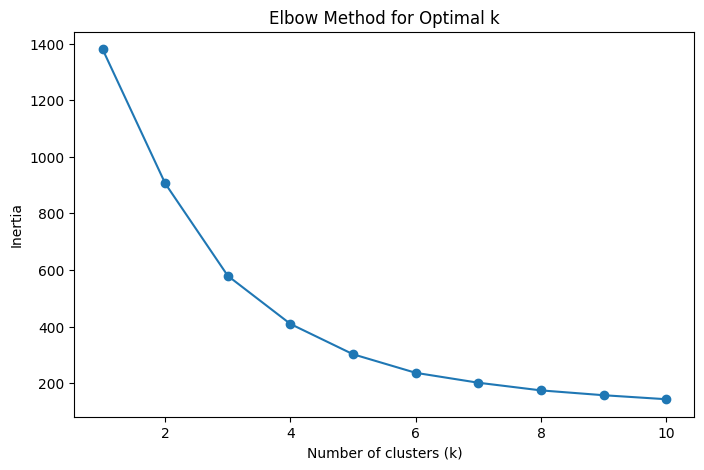

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Selecting the relevant columns for clustering
data_for_clustering = bigbasket_data[['sale_price', 'rating']].dropna()

# Standardizing the data for clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# Using the Elbow Method to find the optimal number of clusters
inertia = []
range_n_clusters = range(1, 11)

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.show()

The Elbow Method plot indicates the optimal number of clusters. Typically, the “elbow” point suggests a good balance between model simplicity and accuracy. Based on this, I’ll select an appropriate number of clusters (likely around 3 or 4) and proceed with clustering and visualizing the results. 

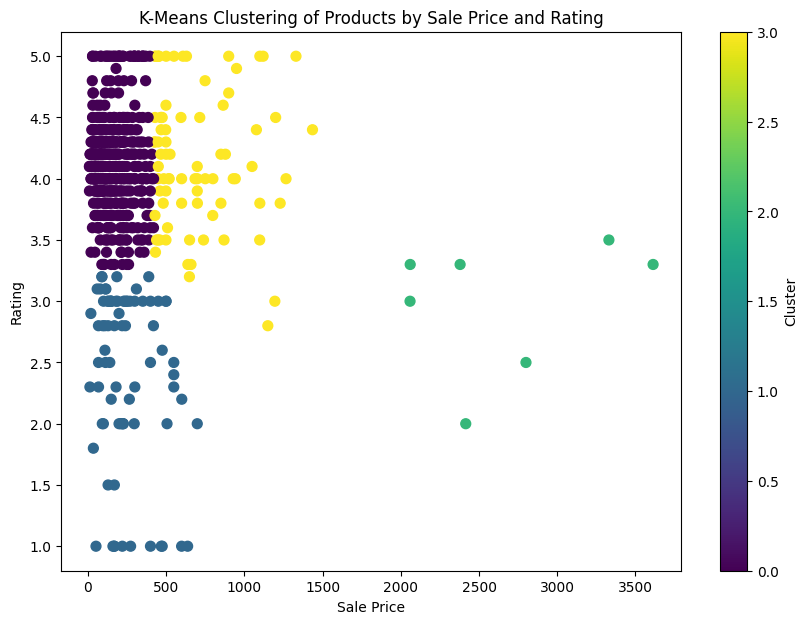

In [15]:
# Choosing 4 clusters based on the elbow method and applying K-Means
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(data_scaled)

# Adding cluster labels to the original dataset for analysis
data_for_clustering['Cluster'] = clusters

# Inverse transform to get back to original scale for interpretation
data_for_clustering[['sale_price', 'rating']] = scaler.inverse_transform(data_scaled)

# Visualizing the clusters
plt.figure(figsize=(10, 7))
plt.scatter(data_for_clustering['sale_price'], data_for_clustering['rating'], c=data_for_clustering['Cluster'], cmap='viridis', s=50)
plt.colorbar(label='Cluster')
plt.xlabel("Sale Price")
plt.ylabel("Rating")
plt.title("K-Means Clustering of Products by Sale Price and Rating")
plt.show()

The scatter plot shows the segmentation of products into four clusters based on sale price and rating. Here’s an interpretation of each cluster and potential marketing insights:

	1.	Low Price / High Rating (e.g., Cluster 1): These products are affordable and highly rated, indicating strong customer satisfaction. Marketing could focus on highlighting value for money, possibly bundling these items with other popular products to encourage cross-selling.
	2.	Low Price / Low Rating (e.g., Cluster 2): These products are budget-friendly but have lower ratings. Marketing strategies could focus on improving product perception, possibly by encouraging reviews or highlighting positive aspects. Promoting discounts or limited-time offers could also attract attention.
	3.	High Price / High Rating (e.g., Cluster 3): High-cost, high-rated products signify premium quality. These can be marketed as luxury or premium items, targeting customers who prioritize quality over price. Emphasizing features and unique selling points in advertisements would be effective.
	4.	High Price / Low Rating (e.g., Cluster 4): These products are expensive yet not highly rated, suggesting they may not meet customer expectations. Marketing could focus on highlighting improvements, collecting feedback for adjustments, or providing assurance with money-back guarantees to rebuild customer trust.

These segments offer tailored approaches to enhance customer satisfaction and drive sales across different price and quality perceptions.